<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# Тема курсової роботи: **Мінімізація функції методом Ньютона**

Тимошенко Дар'я, КМ-82

Курсова робота з предмету "Методи оптимізації" на тему "Мінімізація функції методом Ньютона"

Керівник: викладач Норкін Богдан Володимирович

# Зміст

* Анотація
* Вступ
* Постановка задачі
* Матеріали і методи 
* Розв'язання задачі 
  * Імпорт необхідних бібліотек
  * Визначення констант
  * Опис функцій
  * Обчислення
  * Відображення результатів
* Висновки
* Автори
* Використані джерела



# Анотація

В даній роботі розроблюється та реалізується алгоритм для пошуку точки мінімуму, застосовуючи метод Ньютона.

# Вступ


Проблема оптимізації в даний час виникає практично у всіх областях науки і людської діяльності, тому не може не привертати особливу увагу фахівців будь-яких областей. В ході курсової роботи буде проведено дослідження процесу мінімізації функцій методом Ньютона, а саме як різні параметри згідно постановки задачі впливають на збіжність методу до теоретичного мінімуму. Ціль даного дослідження - отримати набір параметрів, при якому метод оптимізації дає найкращий результат. Предметом дослідження будемо вважати функцію Розенброка та усі параметри, які впливають на ефективність роботи методу.


# Постановка задачі
Дослідити збіжність методу Ньютона при мінімізації функції  Розенброка в залежності від:

1.	Величини кроку h при обчисленні першої та другої похідних.

2.	Схеми обчислення першої та другої похідних.

3.	Вигляду критерію закінчення

    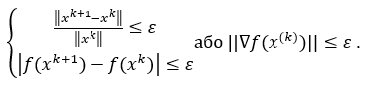

4.	Модифікації методу для задач типу F = ∑ fi2(x)

Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації в залежності від:

1.	Розташування локального мінімума (всередині/поза допустимою областю).

2.	Виду допустимої області (випукла/невипукла).

Функція та початкова точка: 

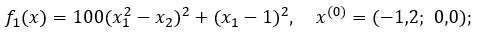

# Матеріали і методи

  Методи других похідних, серед яких найкраще відомий метод Ньютона, виникли з квадратичної апроксимації f(х). Вони використовують інформацію другого порядку, що міститься у других частинних похідних цільової функції f(x) по незалежним змінним.

  Розкладемо цільову функцію в ряд Тейлора, при цьому всі члени порядку 3 і вище відкидаємо — отримаємо квадратичну апроксимацію f(x):

  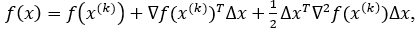

  ∆x^(k)=x^(k+1)-x^(k)

  Якщо ∆x^(k) — напрямок пошуку в методі Ньютона, тоді

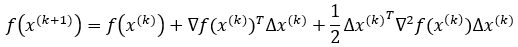

Мінімум функції f(x) за напрямком визначається диференціюванням f(x) за кожною із компонент, після чого отриманий вираз прирівнюється до 0

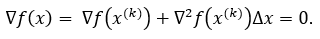

Звідки

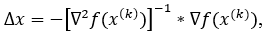

де[∇^2 f(x^(k))]^(-1) — матриця, обернена до матриці Гессе H(x^((k) ) ) в точці x^((k)).

Перехід з точки в точку у методі Ньютона здійснюється у вказаний далі спосіб:

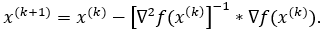

Перехід із точки в точку продовжується поки не виконається критерій закінчення.
Є два види такого критерію:

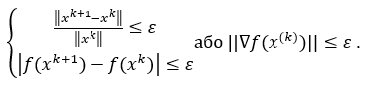

  При обчисленні градієнту на ЕОМ для визначення похідних використовуються
методи правих, лівих та центральних кінцевих різниць.

  Методи внутрішньої точки використовують такі штрафи, при яких стаціонарні точки штрафний функції P(x,R)  є допустимими. Штраф створює уздовж кордону допустимої області бар'єр з нескінченно великих значень функції P(x,R). Ці методи називають методами бар'єрів. Пошук мінімуму починається з точки, в якій всі обмеження виконуються як строгі нерівності. При мінімізації штрафний функції   вихід на межу допустимої області, де штраф Ф нескінченний, не має сенсу, тому процес руху до мінімуму функції ніколи не покине допустиму область. Найчастіше в якості штрафів використовуються наступні функції:

  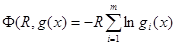

  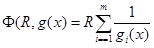


#Розв'язання задачі


# Імпорт необхідних бібліотек

In [ ]:

import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

#Визначення констант

In [ ]:
x0 = [-1.2, 0]
eps = 0.0001
# rounding_accuracy = 5

#Визначення функцій

Функція для обчислення значення функції Розенброка.

In [ ]:
def func(x1, x2):
    return 100 * (x1 ** 2 - x2) ** 2 + (x1 - 1) ** 2

Функція для округлення кожного єлементу списку

In [ ]:
def my_round(arr):
    for index, value in np.ndenumerate(arr):
        arr[index] = round(value, 5)
    return arr

Функція для обчислення похідніх першого порядку по змінним х1 та х2 за схемою центральних різниць. Повертає значення похідних в точці та значення функції Розенброка необхідні для обчислення похідних другого порядку.

In [ ]:
def central_derivatives_1(func, x0, h, f_x):
    x1 = x0[0]
    x2 = x0[1]

    f1 = func(x1 + h, x2)
    f2 = func(x1 - h, x2)
    f3 = func(x1, x2 + h)
    f4 = func(x1, x2 - h)

    df_dx1 = (f1 - f2) / (2 * h)
    df_dx2 = (f3 - f4) / (2 * h)
    return [[df_dx1, df_dx2], [f_x, f1, f2, f3, f4, df_dx2]]

Функція для обчислення похідніх першого порядку по змінним х1 та х2 за схемою правих різниць. Повертає значення похідних в точці та значення функції Розенброка необхідні для обчислення похідних другого порядку.

In [ ]:
def right_derivatives_1(func, x0, h, f_x):
    x1 = x0[0]
    x2 = x0[1]

    f1 = func(x1 + h, x2)
    f2 = func(x1, x2 + h)

    df_dx1 = (f1 - f_x) / h
    df_dx2 = (f2 - f_x) / h

    return [[df_dx1, df_dx2], [f_x, f1, f2, df_dx2]]


Функція для обчислення похідніх першого порядку по змінним х1 та х2 за схемою лівих різниць. Повертає значення похідних в точці та значення функції Розенброка необхідні для обчислення похідних другого порядку.

In [ ]:
def left_derivatives_1(func, x0, h, f_x):
    x1 = x0[0]
    x2 = x0[1]

    f1 = func(x1 - h, x2)
    f2 = func(x1, x2 - h)

    df_dx1 = (f_x - f1) / h
    df_dx2 = (f_x - f2) / h

    return [[df_dx1, df_dx2], [f_x, f1, f2, df_dx2]]

Функція для обчислення похідніх другого порядку по змінним х1 та х2 за схемою центральних різниць.

In [ ]:
def central_derivatives_2(func, x0, h, param):
    x1 = x0[0]
    x2 = x0[1]
    f_x, f1, f2, f3, f4, df_dx2 = param

    df2_dx1 = (f1 - 2 * f_x + f2) / (h ** 2)
    df2_dx2 = (f3 - 2 * f_x + f4) / (h ** 2)

    xm1 = x1 + h
    fm3 = func(xm1, x2 + h)
    fm4 = func(xm1, x2 - h)
    dfm_dx2 = (fm3 - fm4) / (2 * h)
    d2f_dxdy = (dfm_dx2 - df_dx2) / h
    res = np.array([df2_dx1, df2_dx2, d2f_dxdy])
    return res

Функція для обчислення похідніх другого порядку по змінним х1 та х2 за схемою правих різниць.

In [ ]:
def right_derivatives_2(func, x0, h, param):
    x1 = x0[0]
    x2 = x0[1]
    f3 = func(x1 + 2 * h, x2)
    f4 = func(x1, x2 + 2 * h)

    f_x, f1, f2, df_dx2 = param

    df2_dx1 = (f3 - 2 * f1 + f_x) / (h ** 2)
    df2_dx2 = (f4 - 2 * f2 + f_x) / (h ** 2)

    xm1 = x1 + h
    fm1 = func(xm1, x2)
    fm2 = func(xm1, x2 + h)

    dfm_dx2 = (fm2 - fm1) / h
    d2f_dxdy = (dfm_dx2 - df_dx2) / h
    res = np.array([df2_dx1, df2_dx2, d2f_dxdy])
    return res


Функція для обчислення похідніх другого порядку по змінним х1 та х2 за схемою лівих різниць.

In [ ]:
def left_derivatives_2(func, x0, h, param):
    x1 = x0[0]
    x2 = x0[1]
    f3 = func(x1 - 2 * h, x2)
    f4 = func(x1, x2 - 2 * h)

    f_x, f1, f2, df_dx2 = param

    df2_dx1 = (f_x - 2 * f1 + f3) / (h ** 2)
    df2_dx2 = (f_x - 2 * f2 + f4) / (h ** 2)

    xm1 = x1 - h
    fm1 = func(xm1, x2)
    fm2 = func(xm1, x2 - h)

    dfm_dx2 = (fm1 - fm2) / h
    d2f_dxdy = (df_dx2 - dfm_dx2) / h
    res = np.array([df2_dx1, df2_dx2, d2f_dxdy])
    return res

Функція методу Ньютона з критерієм закінчення ||∇f(x^(k))||<=ε

In [ ]:
def Newtons_method1(func, x0, eps, h, derivatives_1, derivatives_2):
    h = 0.00002
    x_pr = x0
    x_list = [x_pr]
    f_x_list = []
    number_of_iterations = 0
    func_ev_number = 0
    if derivatives_1.__name__ == 'central_derivatives_1':
        div1_ev_num = 4
        div2_ev_num = 2
    else:
        div1_ev_num = 2
        div2_ev_num = 4
    while True:
        x1 = x_pr[0]
        x2 = x_pr[1]
        f_x_pr = func(x1, x2)
        f_x_list.append(f_x_pr)
        func_ev_number += 1
        derivatives_res_1 = derivatives_1(func, x_pr, h, f_x_pr)
        df_dx1, df_dx2 = derivatives_res_1[0]
        func_ev_number += div1_ev_num
        param = derivatives_res_1[1]
        gradient_f = np.array([df_dx1, df_dx2])
        gr_norm = np.linalg.norm(gradient_f)
        if gr_norm <= eps:
            break
        number_of_iterations += 1
        df2_dx1, df2_dx2, d2f_dx1dx2 = derivatives_2(func, x_pr, h, param)
        func_ev_number += div2_ev_num
        H = [[df2_dx1, d2f_dx1dx2], [d2f_dx1dx2, df2_dx2]]
        H1 = np.linalg.inv(H)
        x_next = x_pr - H1 @ gradient_f
        x_list.append(x_next)
        x_pr = x_next

    return [x_list, f_x_list, func_ev_number]

Функція методу Ньютона з критерієм закінчення:

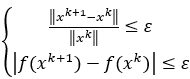

In [ ]:
def Newtons_method2(func, x0, eps, h, derivatives_1, derivatives_2):
  
    x_pr = x0
    x_list = [x_pr]
    number_of_iterations = 1
    f_x_pr = func(x_pr[0], x_pr[1])
    f_x_list = [f_x_pr]
    while True:
        x1 = x_pr[0]
        x2 = x_pr[1]
        derivatives_res_1 = derivatives_1(func, x_pr, h, f_x_pr)
        df_dx1, df_dx2 = derivatives_res_1[0]
        param = derivatives_res_1[1]
        gradient_f = np.array([df_dx1, df_dx2])

        df2_dx1, df2_dx2, d2f_dx1dx2 = derivatives_2(func, x_pr, h, param)
        H = [[df2_dx1, d2f_dx1dx2], [d2f_dx1dx2, df2_dx2]]
        H1 = np.linalg.inv(H)
        x_next = x_pr - H1 @ gradient_f

        x_list.append(x_next)
        f_x_next = func(x_next[0], x_next[1])

        if np.linalg.norm(np.array(x_next - x_pr)) / np.linalg.norm(np.array(x_pr)) <= eps and abs(f_x_next - f_x_pr) <= eps:

            break
        x_pr = x_next
        f_x_pr = f_x_next
        f_x_list.append(f_x_pr)
        number_of_iterations += 1
    return [x_list, f_x_list, number_of_iterations * 7]

Функції для другого завдання (штрафні функції та умови допустимої області)

In [105]:
R = 1000
def func11(x1, x2): # випукла точка всередині допустимої області
    global R
    res = 100 * (x1 ** 2 - x2) ** 2 + (x1 - 1) ** 2 - R * ln(4 - x1 ** 2 - x2 ** 2) #1
    return res

def condition11(x):
    x1 = x[0]
    x2 = x[1]
    radius = 2
    centre = [0, 0]
    if np.sqrt((x1-centre[0])**2+(x2-centre[1])**2) < radius:
        return True
    else:
        return False

def func12(x1, x2): # випукла точка всередині поза допустимою областю
    global R
    res = 100 * (x1 ** 2 - x2) ** 2 + (x1 - 1) ** 2 - R * ln(16 - x1 ** 2 - (x2+4) ** 2)
    return res

def condition12(x):
    x1 = x[0]
    x2 = x[1]
    radius = 4
    centre = [0, -4]
    if np.sqrt((x1-centre[0])**2+(x2-centre[1])**2) < radius:
        return True
    else:
        return False

def func21(x1, x2):
    global R
    res = 100 * (x1 ** 2 - x2) ** 2 + (x1 - 1) ** 2 -  R * ln(49 - (x1 ** 2) - ((x2+4) ** 2)) - R * ln((x1 ** 2) + ((x2+4)**2) - 1)

    return res

def condition21(x):
    x1 = x[0]
    x2 = x[1]
    if (x1 ** 2) + ((x2+4) ** 2) < 49 and (x1 ** 2) + ((x2+4)**2) > 1:
        return True
    else:
        return False

Функція методу штрафних функцій

In [106]:
def internal_point_method(func, x0, eps, derivatives_1, derivatives_2, area_conditions):
    h = 0.000015

    x_pr = x0
    x_list = [x_pr]
    number_of_iterations = 1
    f_x_pr = func(x_pr[0], x_pr[1])
    f_x_list = [f_x_pr]
    while True:
        x1 = x_pr[0]
        x2 = x_pr[1]

        derivatives_res_1 = derivatives_1(func, x_pr, h, f_x_pr)
        df_dx1, df_dx2 = derivatives_res_1[0]
        param = derivatives_res_1[1]
        gradient_f = np.array([df_dx1, df_dx2])
        df2_dx1, df2_dx2, d2f_dx1dx2 = derivatives_2(func, x_pr, h, param)
        H = [[df2_dx1, d2f_dx1dx2], [d2f_dx1dx2, df2_dx2]]

        try:
            H = np.array(H, dtype=float)
        except:
            global flag
            flag = 1

            return [x_list, f_x_list, number_of_iterations*7]
        H1 = np.linalg.inv(H)

        n = 1
        number_of_attempts = 0
        while True:
            x_next = my_round(x_pr - H1 @ gradient_f/n)
            for i in range(2):
                x_next[i] = float(x_next[i])

            x_list.append(x_next)
            if area_conditions(x_next):
                break
            n *= 2
            number_of_attempts += 1

        f_x_next = func(x_next[0], x_next[1])
        if np.linalg.norm(np.array(x_next-x_pr))/np.linalg.norm(np.array(x_pr)) <= eps and abs(f_x_next-f_x_pr)<= eps :
            global R
            R = R/10
            break

        x_pr = x_next
        f_x_pr = f_x_next
        f_x_list.append(f_x_pr)
        number_of_iterations += 1

    return [x_list, f_x_list, number_of_iterations*7]

#Обчислення

In [107]:
h = 0.0001
x11, y11, function_evaluations_number11 = Newtons_method1(func, x0, eps, h, central_derivatives_1, central_derivatives_2)
x12, y12, function_evaluations_number12 = Newtons_method1(func, x0, eps, h, right_derivatives_1, right_derivatives_2)
x13, y13, function_evaluations_number13 = Newtons_method1(func, x0, eps, h, left_derivatives_1, left_derivatives_2)

h = 0.00001
x21, y21, function_evaluations_number21 = Newtons_method1(func, x0, eps, h, central_derivatives_1, central_derivatives_2)
x22, y22, function_evaluations_number22 = Newtons_method1(func, x0, eps, h, right_derivatives_1, right_derivatives_2)
x23, y23, function_evaluations_number23 = Newtons_method1(func, x0, eps, h, left_derivatives_1, left_derivatives_2)

h = 0.000015
x31, y31, function_evaluations_number31 = Newtons_method1(func, x0, eps, h, central_derivatives_1, central_derivatives_2)
x32, y32, function_evaluations_number32 = Newtons_method1(func, x0, eps, h, right_derivatives_1, right_derivatives_2)
x33, y33, function_evaluations_number33 = Newtons_method1(func, x0, eps, h, left_derivatives_1, left_derivatives_2)

h = 0.0001
x211, y211, function_evaluations_number211 = Newtons_method2(func, x0, eps, h, central_derivatives_1, central_derivatives_2)
x212, y212, function_evaluations_number212 = Newtons_method2(func, x0, eps, h, right_derivatives_1, right_derivatives_2)
x213, y213, function_evaluations_number213 = Newtons_method2(func, x0, eps, h, left_derivatives_1, left_derivatives_2)

h = 0.00001
x221, y221, function_evaluations_number221 = Newtons_method2(func, x0, eps, h, central_derivatives_1, central_derivatives_2)
x222, y222, function_evaluations_number222 = Newtons_method2(func, x0, eps, h, right_derivatives_1, right_derivatives_2)
x223, y223, function_evaluations_number223 = Newtons_method2(func, x0, eps, h, left_derivatives_1, left_derivatives_2)

h = 0.000015
x231, y231, function_evaluations_number231 = Newtons_method2(func, x0, eps, h, central_derivatives_1, central_derivatives_2)
x232, y232, function_evaluations_number232 = Newtons_method2(func, x0, eps, h, right_derivatives_1, right_derivatives_2)
x233, y233, function_evaluations_number233 = Newtons_method2(func, x0, eps, h, left_derivatives_1, left_derivatives_2)

R = 1000
point_x1 = [-1.2, 0]
res_list1 = [point_x1]
res_y_list1 = [func11(point_x1[0], point_x1[1])]
flag = 0
total_f_ev_number1 = 0
while True:
    x, y, function_evaluations_number = internal_point_method(func11, point_x1, eps, central_derivatives_1, central_derivatives_2, condition11)
    res_list1.append(x[-1])
    res_y_list1.append(y[-1])
    total_f_ev_number1 += function_evaluations_number
    if (np.linalg.norm(np.array(res_list1[-1]-res_list1[-2]))/np.linalg.norm(np.array(res_list1[-2])) <= eps and abs(res_y_list1[-1]-res_y_list1[-2])<= eps) or flag == 1 :
        break


R = 1000
point_x2 = [1, -2]
res_list2 = [point_x2]
res_y_list2 = [func12(point_x2[0], point_x2[1])]
flag = 0
total_f_ev_number2 = 0
while True:
    x, y, function_evaluations_number = internal_point_method(func12, point_x2, eps, central_derivatives_1, central_derivatives_2, condition12)
    res_list2.append(x[-1])
    res_y_list2.append(y[-1])
    total_f_ev_number2 += function_evaluations_number
    if (np.linalg.norm(np.array(res_list2[-1]-res_list2[-2]))/np.linalg.norm(np.array(res_list2[-2])) <= eps and abs(res_y_list2[-1]-res_y_list2[-2])<= eps) or flag == 1 :
        break
        
R = 1000
point_x3 = [-1, -1]
res_list3 = [point_x3]
res_y_list3 = [func12(point_x3[0], point_x3[1])]
flag = 0
total_f_ev_number3 = 0
while True:
    x, y, function_evaluations_number = internal_point_method(func21, point_x3, eps, central_derivatives_1, central_derivatives_2, condition21)
    res_list3.append(x[-1])
    res_y_list3.append(y[-1])
    total_f_ev_number3 += function_evaluations_number
    if (np.linalg.norm(np.array(res_list3[-1] - res_list3[-2])) / np.linalg.norm(np.array(res_list3[-2])) <= eps and abs(res_y_list3[-1] - res_y_list3[-2]) <= eps) or flag == 1:
        break

#Відображення результатів

Кількість обчислень значень функції: 47.  Точка мінімуму: [1.0000008  1.00000159]   f(x) = 6.532693718142362e-13
Кількість обчислень значень функції: 38.  Точка мінімуму: [0.99405187 0.98812911]   f(x) = 3.5390280227271385e-05
Кількість обчислень значень функції: 45.  Точка мінімуму: [1.00606916 1.01218511]   f(x) = 3.684457561432271e-05
--------------------------------------------------------
Кількість обчислень значень функції: 47.  Точка мінімуму: [1.0000008  1.00000159]   f(x) = 6.532693718142362e-13
Кількість обчислень значень функції: 38.  Точка мінімуму: [0.99405187 0.98812911]   f(x) = 3.5390280227271385e-05
Кількість обчислень значень функції: 45.  Точка мінімуму: [1.00606916 1.01218511]   f(x) = 3.684457561432271e-05
--------------------------------------------------------
Кількість обчислень значень функції: 47.  Точка мінімуму: [1.0000008  1.00000159]   f(x) = 6.532693718142362e-13
Кількість обчислень значень функції: 38.  Точка мінімуму: [0.99405187 0.98812911]   f(x) = 3.

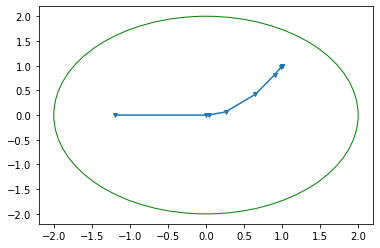

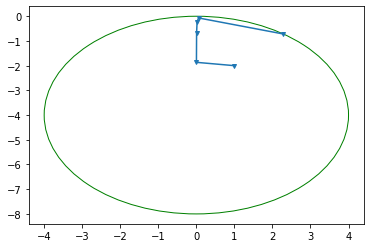

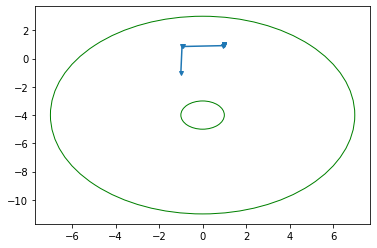

In [108]:
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number11, x11[-1], y11[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number12, x12[-1], y12[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number13, x13[-1], y13[-1]))
print('--------------------------------------------------------')

print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number21, x21[-1], y21[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number22, x22[-1], y22[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number23, x23[-1], y23[-1]))
print('--------------------------------------------------------')

print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number31, x31[-1], y31[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number32, x32[-1], y32[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number33, x33[-1], y33[-1]))
print('------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------')

print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number211, x211[-1], y211[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number212, x212[-1], y212[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number213, x213[-1], y213[-1]))
print('--------------------------------------------------------')

print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number221, x221[-1], y221[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number222, x222[-1], y222[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number223, x223[-1], y223[-1]))
print('--------------------------------------------------------')

print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number231, x231[-1], y231[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number232, x232[-1], y232[-1]))
print('Кількість обчислень значень функції: {}.  Точка мінімуму: {}   f(x) = {}'.format(function_evaluations_number233, x233[-1], y233[-1]))
print('------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------')

print('Точка мінімуму: ', my_round(res_list1[-1]))
print('Кількість обчислень значень функції: ', total_f_ev_number1)

print('-------------------')
print('Точка мінімуму: ', my_round(res_list2[-1]))
print('Кількість обчислень значень функції: ', total_f_ev_number2)
print('-------------------')
print('Точка мінімуму: ', my_round(res_list3[-1]))
print('Кількість обчислень значень функції: ', total_f_ev_number3)

fig, ax = plt.subplots()
res_list1 = np.array(res_list1).T
ax.plot(res_list1[0], res_list1[1], marker='v', markersize=4)
circle1 = plt.Circle((0, 0), 2, color='g', fill=False)
ax = plt.gca()
ax.add_patch(circle1)
plt.show()

fig, ax = plt.subplots()
res_list2 = np.array(res_list2).T
ax.plot(res_list2[0], res_list2[1], marker='v', markersize=4)
circle1 = plt.Circle((0, -4), 4, color='g', fill=False)
ax = plt.gca()
ax.add_patch(circle1)
plt.show()


fig, ax = plt.subplots()
res_list1 = np.array(res_list3).T
ax.plot(res_list1[0], res_list1[1], marker='v', markersize=4)
circle1 = plt.Circle((0, -4), 7, color='g', fill=False)
circle2 = plt.Circle((0, -4), 1, color='g', fill=False)
ax = plt.gca()
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.show()

Можна помітити, що найвищу точність дає метод центральних кінцевих різниць, але метод правих кінцевих різниць в більшості випадків потребує на одну ітерацію менше ніж інші схеми. 

Як і очікувалося при 

#Висновки

Після проведення досліджень та аналізу впливу параметрів методу Ньютона на ефективність пошуку мінімуму функції можна стверджувати, що найбільш точним наближеним методом для обчислення перших та других похідних є метод центральних кінцевих різниць але кількіть ітерацій при використанні цього методу буде більшою ніж при використанні методу правих кінцевих різниць. Було вирішено зробити дві окремі реалізації методу Ньютона з різними критеріями завершення, бо при використанні норми градієнту для перевірки умови нам необхідно обчислити лише перші похідні, що дозволяє зменшити кількість обчислень значень функції.
Найкращий результат було досягнуто із застосуванням центральної схеми з кроком h = 0.000015 та при критерії закінчення

||∇f(x^(k))||<=ε


 Точку мінімуму (1, 1) було досягнуто за 7 ітерацій (47 обчисленнь значень функції), що є дуже гарним результатом.
 На жаль метод штрафних функції не дав такого гарного результату. Як і очікувалося, якщо точка мінімуму знаходиться всередині допустимої області, то ми знайдемо її, якщо ні, тоді алгоритм буде рухатися вздовж границі допустимої області.  


#Автор

[Тимошенко Дар'я КМ-82](https://github.com/DashaTimoshenko/Course_work/tree/master)

# Використані джерела

http://www.apmath.spbu.ru/ru/staff/abbasov_m_e/files/MO1.pdf
http://mathserfer.narod.ru/node49.html
https://ru.wikipedia.org/wiki/%D0%A1%D0%BC%D0%B5%D1%88%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F

Реклейтис Г. Оптимизация в технике : В 2-х книгах / Реклейтис Г., Рейвиндран А., Рэгсдел К. – М. : Мир, 1986. – 747 с.

Д. Химмельблау. «Прикладное нелинейное программирование». М .; «Мир», 1975.
